In [390]:
import xml.etree.ElementTree as ET
import urllib.request
import csv
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import json
import re
import os


In [383]:
#### Get WIGOS IDs for all stations catalogued in a country ####

country = "KEN"

# API: all stations as json
all_stations_KEN_url = "https://oscar.wmo.int/surface/rest/api/search/station?territoryName="+country


response = urlopen(all_stations_KEN_url)
data_json = json.loads(response.read())
stations = data_json["stationSearchResults"]

wigosIds = []

for station in data_json["stationSearchResults"]:
    # print(station["wigosId"])
    wigosId = str(station["wigosId"])
    wigosIds.append(wigosId)

print(wigosIds)

['0-404-300-301570787AS00074', '0-404-300-402261127AS63663', '0-404-300-271440721AS00049', '0-404-300-281480740AS00057', '0-404-0-63707', '0-404-300-392191090AS63662', '0-404-0-63721', '0-404-300-040200100AS00113', '0-404-300-040200098AS00112', '0-404-300-301620807AS00073', '0-404-300-301580790AS00071', '0-404-300-402251125AS00038', '0-404-300-402281141AS00036', '0-404-300-402291146AS00033', '0-404-300-392181085AS63660', '0-404-300-361950974AS00015', '0-20000-0-63741', '0-404-300-472781389AS63747', '0-404-300-100470235AS00114', '0-404-300-372081037AS00024', '0-404-300-372000999AS00025', '0-404-300-372031019AS00022', '0-404-300-372101048AS00026', '0-20000-0-63688', '0-404-300-63686', '0-20000-0-63720', '0-404-0-63719', '0-404-300-341870932AS00005', '0-404-300-341840918A00001', '0-404-300-050210101AS00090', '0-404-0-63670', '0-20000-0-63723', '0-404-300-190950473AS00101', '0-404-300-060230111AS00047', '0-404-300-190950476AS00099', '0-404-300-070320150AS00107', '0-404-300-341840918AS00001

In [423]:
for id in wigosIds:
    print(id)

0-404-300-301570787AS00074
0-404-300-402261127AS63663
0-404-300-271440721AS00049
0-404-300-281480740AS00057
0-404-0-63707
0-404-300-392191090AS63662
0-404-0-63721
0-404-300-040200100AS00113
0-404-300-040200098AS00112
0-404-300-301620807AS00073
0-404-300-301580790AS00071
0-404-300-402251125AS00038
0-404-300-402281141AS00036
0-404-300-402291146AS00033
0-404-300-392181085AS63660
0-404-300-361950974AS00015
0-20000-0-63741
0-404-300-472781389AS63747
0-404-300-100470235AS00114
0-404-300-372081037AS00024
0-404-300-372000999AS00025
0-404-300-372031019AS00022
0-404-300-372101048AS00026
0-20000-0-63688
0-404-300-63686
0-20000-0-63720
0-404-0-63719
0-404-300-341870932AS00005
0-404-300-341840918A00001
0-404-300-050210101AS00090
0-404-0-63670
0-20000-0-63723
0-404-300-190950473AS00101
0-404-300-060230111AS00047
0-404-300-190950476AS00099
0-404-300-070320150AS00107
0-404-300-341840918AS00001
0-404-300-160810398AS00009
0-404-300-070320160AS00106
0-20000-0-63740
0-20000-0-63687
0-404-300-372021012AS63

In [446]:
#### create json file #####
 
j_data = '{"stations":[]}' 

file = open("stations.json", "w")
file.write(j_data)
file.close()


In [439]:
#### append information to json file ####

def write_json(new_data, filename='stations.json'):
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["stations"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [447]:
#### Get station xml Files via jOAI ####

for id in wigosIds:

    # get url
    url = "https://oscar.wmo.int/oai/provider?verb=GetRecord&metadataPrefix=wmdr&identifier=%20" + id

    # get xml from url
    document = requests.get(url)
    soup= BeautifulSoup(document.content,"xml")

    #### get information to plot ####

    metadata = soup.find('metadata') #check if xml file is available on jOAI
    if metadata:

        # Name
        name = soup.find_all('name')
        name = re.findall(r'.*?\>(.*)\<.*',str(name))

        # Location
        location = soup.find_all('pos')
        location = re.findall(r'.*?\>(.*)\<.*',str(location))[0]
        loc = re.findall(r'-?[0-9]*\.?[0-9]*', location)
        
        lat = loc[0]
        lon = loc[2]
        if len((loc)) == 6: # check if elevation is given
            ele = loc[4]
        else:
            ele = "unknown"
       
        # observed Variables
        observedProperties = soup.find_all('observedProperty')
        observedProperties_notation = re.findall(r'\d+',str(observedProperties))
            
        # begin Position
        beginPosition = soup.find_all('beginPosition')
        beginPosition = re.findall(r'\d{4}-\d{2}-\d{2}',str(beginPosition))[0]
        # print(beginPosition)

        # ReportingStatus
        reportingStatus = soup.find('reportingStatus')
        if reportingStatus:
            reportingStatus = soup.find_all('reportingStatus')
            reportingStatus = re.findall(r'http://codes.wmo.int/wmdr/ReportingStatus/(.*)\"\s.*',str(reportingStatus))[0]
        else:
            reportingStatus = "unknown"
        

        #### save to json File ####
        aDict = {"wigosId" : id, "name":name, "lat":lat, "lon":lon, "ele":ele, "observedProperties" : observedProperties_notation, "beginPosition" : beginPosition, "reportingStatus" : reportingStatus}
        print(aDict)
        write_json(aDict)
   

{'wigosId': '0-404-300-301570787AS00074', 'name': ['AIC Churo Girls  High School'], 'lat': '0.7668', 'lon': '36.4056', 'ele': '1798.0', 'observedProperties': ['210', '216', '224', '251', '12005', '12006'], 'beginPosition': '2021-11-29', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-402261127AS63663', 'name': ['ALUPE'], 'lat': '0.497', 'lon': '34.1252', 'ele': 'unknown', 'observedProperties': ['210', '210', '216', '224', '225', '230', '251', '12005', '12006'], 'beginPosition': '2020-09-22', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-271440721AS00049', 'name': ['Ainabkoi KCC Plant'], 'lat': '0.1601', 'lon': '35.5204', 'ele': '2635.0', 'observedProperties': ['210', '216', '224', '251', '12005', '12006'], 'beginPosition': '2021-11-18', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-281480740AS00057', 'name': ['Arror Irrigation scheme (Agromet)'], 'lat': '0.9388', 'lon': '35.625', 'ele': '1034.0', 'observedProperties': ['210', '216', '224', '251', '12005',

In [448]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.lines as mlines

In [449]:
# Load map background
m = Basemap(projection='lcc', resolution='h', 
            lat_0=0.1, lon_0=37.5,
            width=1.5E6, height=1.2E6)

In [451]:
f = open(os.getcwd()+'/stations.json')
data = json.load(f)

for i in data['stations']:
    print(float(i["lat"]))

0.7668
0.497
0.1601
0.9388
-0.714732
0.3253
-0.099
-0.0975
-0.7252
0.0393
0.6814
0.6921
0.4584
0.3401
0.7333
-1.003
-1.301217
-1.301217
2.3349
0.1656
0.7827
0.413
0.1882
0.405104
0.53333
-0.500633
-0.56
-2.3278
-1.9961
-2.0613
0.567
-0.476425
-0.3182
-3.2658
-0.1254
-1.8506
-1.6871
-1.5918
-1.334453
0.2775
0.26667
-3.6935
-0.066
-0.34
-0.3628611
-0.4725
-0.2689
-0.682778
-0.086148
1.002618
-0.1582
1.4915
1.2026
1.0411
-0.6786
0.4362
1.1459
-0.3563
-3.8333
-1.4448
-0.1985
0.4838
0.4209
0.5985
-0.2241
0.0519
0.6874
-2.22661
3.118498
1.95
1.5825
-0.2604
0.312
-2.2861111111
-3.2308333333
3.9329326
2.3338888889
0.082038
-0.357
-4.04634
3.525778
0.387
-1.5455
-0.8529
2.9466
-2.9900000095
-2.163
-3.595
3.5144
0.095
9.0
2.0622
-0.9646
-0.1928
0.0246
0.2016
-0.3752
-0.0621999986
0.1672
-0.1542
-0.2477
-0.270841
-1.094662
-1.4948
-1.3406893
-0.442363
-2.0177
-2.4054
-2.3818
-1.30169
1.3614
-0.0617
-0.8269
0.4098
-0.0625
0.2514
1.2913
-0.0416
-0.0351
-1.5233
-0.1207
-2.5118
-2.1618
-1.4145
-1.321

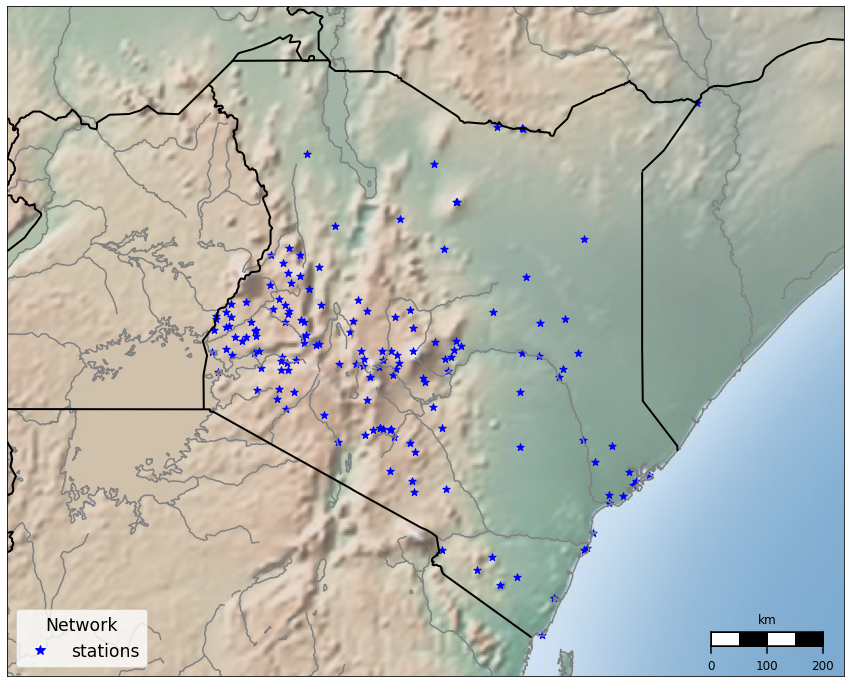

In [455]:
#### DRAW MAP ####

fig = plt.figure(figsize=(15, 15))


# map background
# m.fillcontinents(color='tan',lake_color='lightblue')
m.shadedrelief()
# m.etopo()
# m.bluemarble()
m.drawmapscale(lon=43, lat=-4.7, lon0=43,lat0=-4, length=200, barstyle="fancy", linecolor="black", fillcolor2="black", fontsize=12, fontcolor="black")
m.drawcoastlines(color='grey', linewidth=1.5)
m.drawrivers(color='grey', linewidth=1.5)
m.drawcountries(color='black', linewidth=2)
# m.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)
# m.drawmapboundary(color='k', linewidth=1.0, fill_color=None, zorder=None, ax=None)



# f = open('data.json')
# data = json.load(f)

f = open(os.getcwd()+'/stations.json')
data = json.load(f)

for i in data['stations']:
    # print(float(i["lat"]))
    lat = float(i["lat"])
    lon = float(i["lon"])
    m.scatter(lon, lat,latlon=True,c="blue",s=60,marker="*")


# legend
stations = mlines.Line2D([], [], color='blue', marker='*', linestyle='None',markersize=10, label='stations')
plt.legend(handles=[stations], loc=3, title="Network", title_fontsize="xx-large", labelcolor="black", fontsize="xx-large")


# save plot
plt.savefig("/home/sdanioth/Documents/git/plot_map/plots/test_plot.pdf", bbox_inches='tight')